In [1]:
# Required imports
import pandas as pd
#import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
healthcare_csv = pd.read_csv('Resources/watson_healthcare_modified.csv')
shap_csv = pd.read_csv('Resources/watson_shap_values_for_testset.csv')

In [4]:
healthcare_csv

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [5]:
shap_csv

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,ShiftSchedule,State,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10011,-0.082934,-0.049007,0.033110,-0.052101,-0.094783,-0.007782,-0.056123,0,-0.106410,...,0.109181,-0.195666,0.056648,0.011107,-0.017621,-0.000377,-0.032997,0.003732,-0.042552,-0.120689
1,10012,-0.061724,-0.185156,0.004095,-0.055188,-0.063846,-0.032673,-0.057622,0,-0.025947,...,-0.035909,-0.169545,0.043217,0.079458,-0.052512,-0.043295,0.060303,0.016709,-0.037952,0.152560
2,10013,0.006087,-0.057510,0.017782,-0.002091,-0.008152,-0.028928,-0.070993,0,-0.042936,...,-0.038788,-0.169869,0.099417,-0.009016,-0.046488,-0.080971,-0.022697,0.007191,-0.037359,-0.110958
3,10014,-0.012834,0.242323,-0.044950,-0.039829,-0.133996,-0.034905,-0.051805,0,-0.053241,...,-0.024949,0.165522,0.033103,-0.006922,-0.044399,-0.036111,-0.074827,-0.025470,0.004950,-0.036003
4,10015,-0.035391,-0.023601,0.014274,0.015462,-0.138073,0.007920,0.052945,0,-0.072430,...,-0.022945,0.126107,0.101879,-0.028295,-0.055819,-0.049084,-0.013705,0.011744,-0.039383,-0.054550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,10212,-0.039493,-0.034747,-0.044727,-0.022448,-0.117214,0.029679,-0.013860,0,-0.049312,...,-0.058096,-0.161909,-0.030475,-0.034089,-0.044657,-0.042839,-0.041159,-0.042855,-0.054734,-0.049729
202,10213,-0.091602,-0.053394,-0.107608,-0.053622,-0.109185,-0.012358,-0.083148,0,-0.023243,...,-0.028543,-0.160014,-0.005274,-0.015650,-0.028211,-0.015259,-0.041551,-0.032326,0.159189,-0.051259
203,10214,0.249557,-0.104146,0.015778,-0.091577,0.014157,0.022667,-0.102058,0,0.301851,...,-0.012861,0.224978,-0.058046,0.083066,0.003723,0.042219,0.120966,0.033763,-0.022962,0.393495
204,10215,-0.015204,-0.034563,-0.025504,-0.055249,-0.047021,0.015875,-0.072875,0,-0.042504,...,-0.041672,0.102638,0.077688,-0.035025,-0.009765,-0.055626,-0.028669,-0.031676,0.194487,-0.073237


In [6]:
healthcare_csv.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
shap_csv.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'ShiftSchedule', 'State', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
## We tried to merge the two datasets from Kaggle on EmployeeID; however, they seem to be distinct tables as there is no overlapping
## EmployeeIds. So we simply used the dataset, called healthcare_csv, since that contains the Attrition variable.

merged = healthcare_csv.merge(shap_csv, on='EmployeeID')
merged

,EmployeeID,Age_x,Attrition,BusinessTravel_x,DailyRate_x,Department_x,DistanceFromHome_x,Education_x,EducationField_x,EmployeeCount,...,RelationshipSatisfaction_y,ShiftSchedule,State,TotalWorkingYears_y,TrainingTimesLastYear_y,WorkLifeBalance_y,YearsAtCompany_y,YearsInCurrentRole_y,YearsSinceLastPromotion_y,YearsWithCurrManager_y


In [9]:
healthcare_csv['EmployeeID'].unique()

array([1313919, 1200302, 1060315, ..., 1812428, 1812429, 1152329],
      dtype=int64)

In [10]:
shap_csv['EmployeeID'].unique()

array([10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 10019,
       10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028,
       10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037,
       10038, 10039, 10040, 10041, 10042, 10043, 10044, 10045, 10046,
       10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054, 10055,
       10056, 10057, 10058, 10059, 10060, 10061, 10062, 10063, 10064,
       10065, 10066, 10067, 10068, 10069, 10070, 10071, 10072, 10073,
       10074, 10075, 10076, 10077, 10078, 10079, 10080, 10081, 10082,
       10083, 10084, 10085, 10086, 10087, 10088, 10089, 10090, 10091,
       10092, 10093, 10094, 10095, 10096, 10097, 10098, 10099, 10100,
       10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108, 10109,
       10110, 10111, 10112, 10113, 10114, 10115, 10116, 10117, 10118,
       10119, 10120, 10121, 10122, 10123, 10124, 10125, 10126, 10127,
       10128, 10129, 10130, 10131, 10132, 10133, 10134, 10135, 10136,
       10137, 10138,

In [11]:
healthcare_csv

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [12]:
## Since the Attrition column is composed of the values "Yes" or "No," in order to perform calculations, we need to assign the value
## "Yes" to the integer 1 and the value "No" to the integer 0.

data_binary = healthcare_csv.copy()
data_binary['Attrition'] = data_binary['Attrition'].map({'Yes': 1, 'No': 0})
data_binary

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


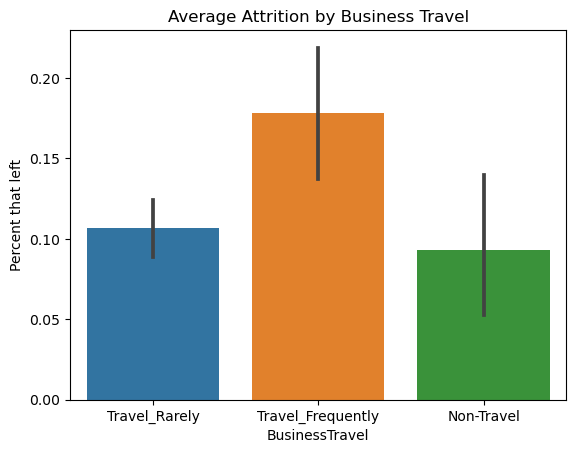

In [13]:
sns.barplot(data_binary, x='BusinessTravel', y='Attrition');
plt.title('Average Attrition by Business Travel');
plt.ylabel('Percent that left');

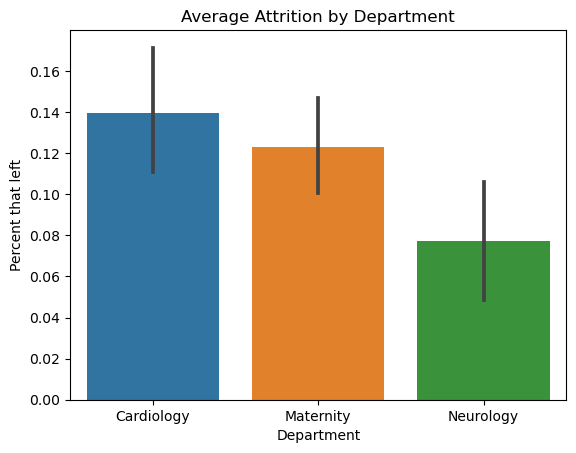

In [14]:
sns.barplot(data_binary, x='Department', y='Attrition');
plt.title('Average Attrition by Department');
plt.ylabel('Percent that left');

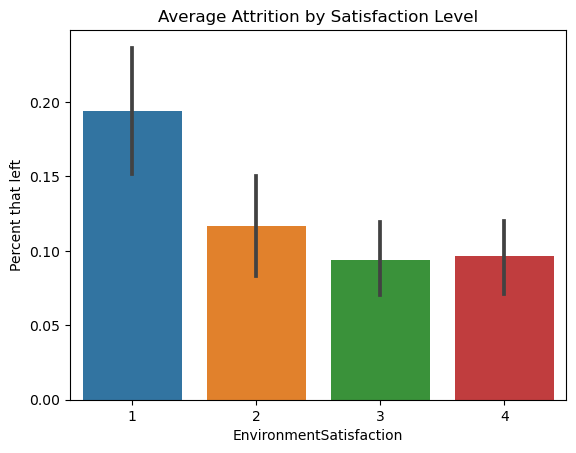

In [15]:
sns.barplot(data_binary, x='EnvironmentSatisfaction', y='Attrition');
plt.title('Average Attrition by Satisfaction Level');
plt.ylabel('Percent that left');

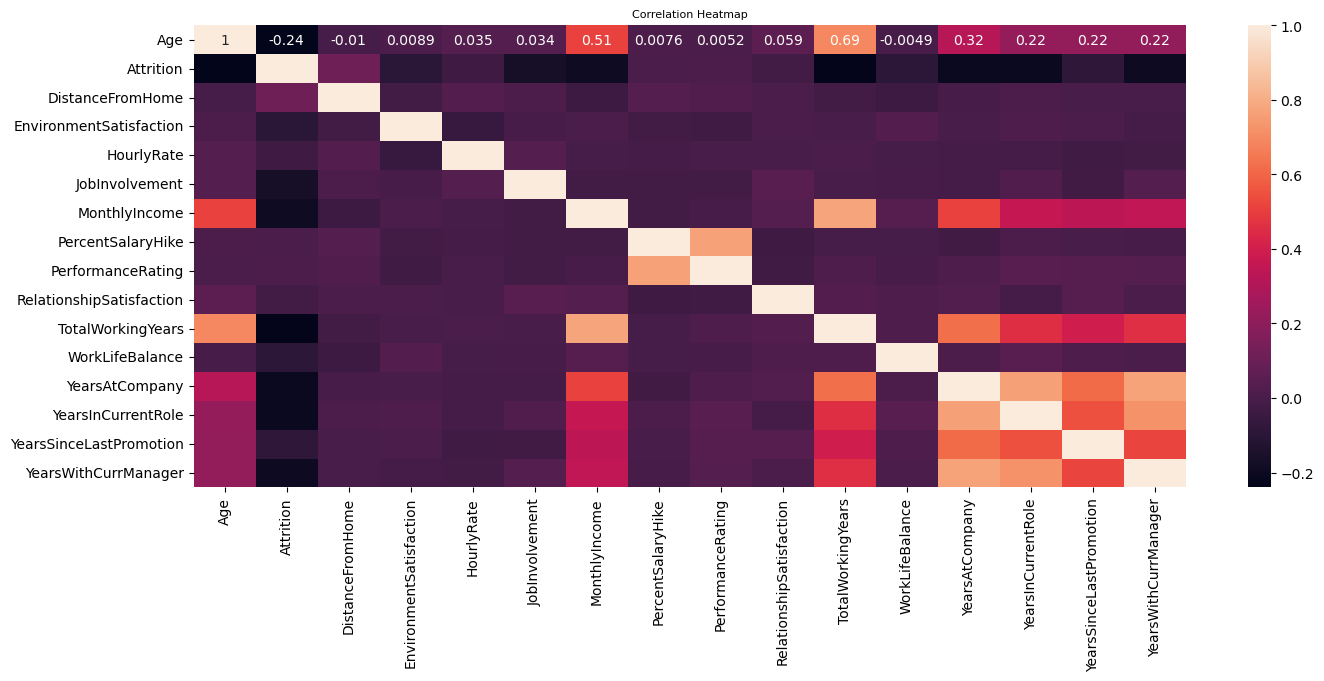

In [16]:
## Below are all the correlations between variables that are continuous against the Attrition variable.

data_binary_filtered = data_binary[['Age', 'Attrition', 'DistanceFromHome',
                                             'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                                             'MonthlyIncome','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                                               'TotalWorkingYears', 'WorkLifeBalance',
                                             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                                               'YearsWithCurrManager']]
correlations = data_binary_filtered.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlations, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=6);

In [17]:
 ## To double check the above results, we performed a few individual point biserial correlations, which is a special case of
 ## the Pearson Coefficient. This is able to  measure the correlation between a binary variable and a continuous variable.
 ## As it turned out, we received the same results as the above heatmap, so we can use it.

 ## Here, the correlation between 'DistanceFromHome' and 'Attrition' is 0.11. This result is statistically significant since the p-value
 ## is less than  0.05.

from scipy import stats
b = data_binary['DistanceFromHome']
a = data_binary['Attrition']
stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.10558011137359281, pvalue=1.4828040878620907e-05)

In [18]:
## Here, the correlation between 'Age' and 'Attrition' is -0.24. This result is statistically significant since the p-value
## is less than  0.05.

from scipy import stats
b = data_binary['Age']
a = data_binary['Attrition']
stats.pointbiserialr(a, b)

SignificanceResult(statistic=-0.23998378812994633, pvalue=2.20598604651515e-23)

In [19]:
## Here, the correlation between 'EnvironmentSatisfaction' and 'Attrition' is -0.10. This result is statistically significant since the p-value
 ## is less than  0.05.

from scipy import stats
b = data_binary['EnvironmentSatisfaction']
a = data_binary['Attrition']
stats.pointbiserialr(a, b)

SignificanceResult(statistic=-0.10127754577915644, pvalue=3.270133084794789e-05)

In [ ]:
## Data Cleaning

In [ ]:
# Display the number of null values in each column
null_counts = healthcare_csv.isnull().sum()
print("Null values in each column:\n", null_counts)

# Display rows with null values
rows_with_nulls = healthcare_csv[healthcare_csv.isnull().any(axis=1)]
print("Rows with null values:\n", rows_with_nulls)

NameError: name 'healthcare_csv' is not defined